In [1]:
import numpy as np
import pandas as pd
import datetime
import geopandas as gpd
pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.float_format = '{:.5f}'.format
import warnings
warnings.filterwarnings("ignore")
# %pip install contextily

import matplotlib.colors as mcolors
from shapely.geometry import Point
from geopandas import GeoDataFrame

In [2]:
%%time
df_shap = pd.read_csv("./output/food_localness_final_oct_new_shap_values.csv", sep=",", header=0)
df_shap = df_shap.drop(columns=['account_id','customer_lon','customer_lat','vendor_id','vendor_lon','vendor_lat'])
print(df_shap.shape[0])
df_shap.head()

2782961
CPU times: user 13.3 s, sys: 2.37 s, total: 15.6 s
Wall time: 19.4 s


,order_id,shap_customer_lon,shap_customer_lat,shap_basket_amount_lc,shap_price_per_item,shap_order_time_hour,shap_total_duration,shap_estimated_rent,shap_entropy_0.5km,shap_entropy_2km,shap_entropy_5km,shap_incentive_amount_lc,shap_incentive_delivery,shap_incentive_menu_discount,shap_incentive_voucher_wallet,shap_main_cuisine,shap_isweekend,shap_consistency,shap_total_orders,shap_rating,shap_n_rating,shap_restaurant_count_0.5km,shap_restaurant_count_0.5_1km,shap_restaurant_count_1_2km,shap_restaurant_count_2_3km,shap_restaurant_count_3_4km,shap_restaurant_count_4_5km
0,1304769890,-0.00700,-0.01416,-0.01049,-0.03658,0.05246,-0.05788,-0.01585,0.00036,-0.00766,0.00060,0.01495,-0.00232,0.01096,0.00100,-0.02045,0.00069,0.00302,-0.00381,-0.00390,0.00393,-0.07875,-0.01005,0.01626,-0.02434,0.00044,-0.00006
1,1304769334,0.00155,-0.01932,-0.00655,-0.03077,0.05136,-0.03860,-0.01359,-0.01035,-0.00673,0.00457,0.01726,-0.00001,0.00937,0.00102,-0.00446,-0.00003,-0.00126,-0.00231,0.01493,0.00445,-0.06185,-0.01068,0.00895,-0.01686,0.00066,-0.00035
2,1306219965,-0.01347,-0.02119,0.00027,0.02538,0.03483,0.01954,-0.01046,-0.00508,-0.01530,-0.00191,-0.00811,0.00005,-0.01162,-0.00086,0.00638,-0.00073,-0.00293,-0.00914,0.00652,0.02472,-0.08642,-0.00981,-0.00867,-0.00991,-0.00350,-0.00520
3,1295994041,-0.01150,-0.02168,-0.00094,0.02542,0.03613,0.05872,-0.01017,-0.00242,-0.01868,-0.00022,-0.00852,0.00004,-0.00976,-0.00056,0.01619,-0.00055,-0.00360,-0.00835,0.01021,0.02568,-0.09305,-0.01366,-0.00944,-0.00957,-0.00265,-0.00616
4,1304742536,-0.00545,-0.02307,-0.00619,-0.01789,0.02276,-0.02453,-0.00766,-0.03050,-0.01598,0.00167,0.02036,-0.00529,0.00153,0.00001,-0.01623,0.00070,-0.00121,-0.00197,-0.04450,-0.02838,-0.06445,-0.00714,-0.01947,-0.00973,-0.00985,-0.02598


In [3]:
df_localness = pd.read_csv('./data/food_localness_final_oct_new.csv')
print(df_localness.shape[0])

2782961


In [4]:
df_shap_merged = df_localness.merge(df_shap, on='order_id')
print(df_shap_merged.shape[0])

2782961


# Hexagon

<Axes: >

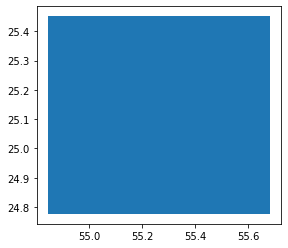

In [26]:
from shapely.geometry import box

bound_lat = [24.776468,25.451666]
bound_lon = [54.842954,55.680861] # 25.637066, 55.849584 

dubai_box = gpd.GeoDataFrame(geometry=[box(bound_lon[0],bound_lat[0],bound_lon[1],bound_lat[1])],crs="EPSG:4326")
dubai_box.plot()

CPU times: user 1.77 s, sys: 102 ms, total: 1.87 s
Wall time: 1.74 s


,index,geometry
h3_polyfill,,
8843a1264bfffff,0,"POLYGON ((55.33872 25.14613, 55.34047 25.14184, 55.34558 25.14071, 55.34893 25.14387, 55.34717 25.14816, 55.34206 25.14929, 55.33872 25.14613))"
8843a12dc5fffff,0,"POLYGON ((55.45700 24.91333, 55.45874 24.90905, 55.46383 24.90792, 55.46717 24.91107, 55.46543 24.91535, 55.46034 24.91648, 55.45700 24.91333))"
8843a1a44dfffff,0,"POLYGON ((55.03979 25.36401, 55.04157 25.35971, 55.04669 25.35860, 55.05003 25.36178, 55.04825 25.36607, 55.04313 25.36719, 55.03979 25.36401))"
8843a12957fffff,0,"POLYGON ((55.29591 24.83245, 55.29766 24.82818, 55.30274 24.82705, 55.30607 24.83020, 55.30432 24.83447, 55.29924 24.83560, 55.29591 24.83245))"
8843ae945dfffff,0,"POLYGON ((55.57552 24.90639, 55.57725 24.90210, 55.58234 24.90097, 55.58570 24.90411, 55.58396 24.90840, 55.57887 24.90953, 55.57552 24.90639))"


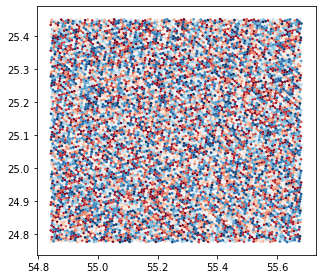

In [36]:
%%time
# %pip install h3pandas
# create hexagon within the UAE border
import geopandas as gpd
import h3pandas

resolution = 8 # Average edge length: 500m
hexagons = dubai_box.h3.polyfill_resample(resolution)
ax = hexagons.plot(figsize=(5, 5), cmap='RdBu')
hexagons.head()

In [52]:
%%time

selected_feature = 'estimated_rent'
# Some continuous features to be considered: incentive_amount_lc, entropy_0.5km, restaurant_count_0.5km, estimated_rent, price_per_item, incentive_delivery

df_onefeature = df_shap_merged[['account_id','order_id','customer_lon','customer_lat', selected_feature,'shap_'+selected_feature]]
geometry2 = [Point(xy) for xy in zip(df_onefeature.customer_lon, df_onefeature.customer_lat)]
gdf_onefeature = GeoDataFrame(df_onefeature, crs="EPSG:4326", geometry=geometry2)
# gdf_test = gdf_onefeature.head(1000)
# gdf_test.head()

CPU times: user 16.1 s, sys: 552 ms, total: 16.7 s
Wall time: 16.5 s


In [53]:
%%time
mean_hex = gpd.sjoin(gdf_onefeature, hexagons, op='within') 
hexagon_agg = mean_hex[['index_right',selected_feature,'shap_'+selected_feature]].groupby('index_right').agg('mean')
hexagon_agg_ordernumber = hexagons.merge(hexagon_agg,left_index=True,right_index=True) # focus on hexagons that contains delivery data
print(hexagon_agg_ordernumber.shape[0])
hexagon_agg_ordernumber.head()

1351
CPU times: user 4.22 s, sys: 2.37 s, total: 6.59 s
Wall time: 6.6 s


,index,geometry,estimated_rent,shap_estimated_rent
8843a1264bfffff,0,"POLYGON ((55.33872 25.14613, 55.34047 25.14184, 55.34558 25.14071, 55.34893 25.14387, 55.34717 25.14816, 55.34206 25.14929, 55.33872 25.14613))",40.59006,-0.00320
8843a12001fffff,0,"POLYGON ((55.27802 25.01141, 55.27977 25.00713, 55.28486 25.00600, 55.28820 25.00916, 55.28644 25.01344, 55.28135 25.01457, 55.27802 25.01141))",79.19807,-0.00507
8843acc8d3fffff,0,"POLYGON ((55.44574 25.27096, 55.44749 25.26666, 55.45261 25.26553, 55.45597 25.26870, 55.45421 25.27300, 55.44910 25.27413, 55.44574 25.27096))",37.40825,-0.00873
8843a13113fffff,0,"POLYGON ((55.13894 25.03428, 55.14071 25.03000, 55.14580 25.02888, 55.14913 25.03204, 55.14736 25.03632, 55.14227 25.03744, 55.13894 25.03428))",85.02724,-0.00299
8843a1354dfffff,0,"POLYGON ((55.21048 25.10810, 55.21224 25.10382, 55.21734 25.10270, 55.22068 25.10586, 55.21892 25.11014, 55.21382 25.11127, 55.21048 25.10810))",54.83126,-0.00961


In [54]:
feature_mean = hexagon_agg_ordernumber[selected_feature].median()
shap_threshold = 0.00
# df_onefeature = df_onefeature.groupby(['account_id','customer_lon','customer_lat'])[[selected_feature,'shap_'+selected_feature]].mean().reset_index()
# df_onefeature['Quadrant'] = 'NaN'
hexagon_agg_ordernumber.loc[(hexagon_agg_ordernumber[selected_feature]>=feature_mean) & (hexagon_agg_ordernumber['shap_'+selected_feature]>shap_threshold),'Quadrant'] = 'High-Positive'
hexagon_agg_ordernumber.loc[(hexagon_agg_ordernumber[selected_feature]>=feature_mean) & (hexagon_agg_ordernumber['shap_'+selected_feature]<=-1*shap_threshold),'Quadrant'] = 'High-Negative'
hexagon_agg_ordernumber.loc[(hexagon_agg_ordernumber[selected_feature]<feature_mean) & (hexagon_agg_ordernumber['shap_'+selected_feature]>shap_threshold),'Quadrant'] = 'Low-Positive'
hexagon_agg_ordernumber.loc[(hexagon_agg_ordernumber[selected_feature]<feature_mean) & (hexagon_agg_ordernumber['shap_'+selected_feature]<=-1*shap_threshold),'Quadrant'] = 'Low-Negative'
print(hexagon_agg_ordernumber.Quadrant.value_counts())
hexagon_agg_ordernumber.head()

Low-Negative     497
High-Positive    390
High-Negative    286
Low-Positive     178
Name: Quadrant, dtype: int64


,index,geometry,estimated_rent,shap_estimated_rent,Quadrant
8843a1264bfffff,0,"POLYGON ((55.33872 25.14613, 55.34047 25.14184, 55.34558 25.14071, 55.34893 25.14387, 55.34717 25.14816, 55.34206 25.14929, 55.33872 25.14613))",40.59006,-0.00320,Low-Negative
8843a12001fffff,0,"POLYGON ((55.27802 25.01141, 55.27977 25.00713, 55.28486 25.00600, 55.28820 25.00916, 55.28644 25.01344, 55.28135 25.01457, 55.27802 25.01141))",79.19807,-0.00507,High-Negative
8843acc8d3fffff,0,"POLYGON ((55.44574 25.27096, 55.44749 25.26666, 55.45261 25.26553, 55.45597 25.26870, 55.45421 25.27300, 55.44910 25.27413, 55.44574 25.27096))",37.40825,-0.00873,Low-Negative
8843a13113fffff,0,"POLYGON ((55.13894 25.03428, 55.14071 25.03000, 55.14580 25.02888, 55.14913 25.03204, 55.14736 25.03632, 55.14227 25.03744, 55.13894 25.03428))",85.02724,-0.00299,High-Negative
8843a1354dfffff,0,"POLYGON ((55.21048 25.10810, 55.21224 25.10382, 55.21734 25.10270, 55.22068 25.10586, 55.21892 25.11014, 55.21382 25.11127, 55.21048 25.10810))",54.83126,-0.00961,Low-Negative


estimated_rent


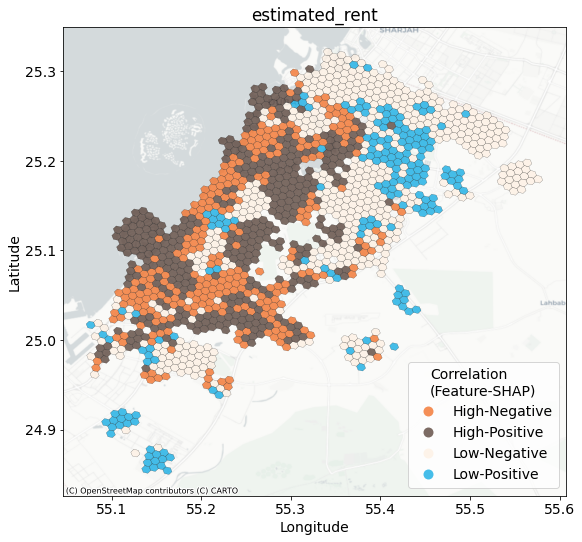

CPU times: user 2.12 s, sys: 292 ms, total: 2.41 s
Wall time: 1.96 s


In [76]:
%%time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(9, 9))
print(selected_feature)
# High-Negative, High-Positive, Low-Negative, Low-Positive
colorlist = ['#f3742e','#5c473e', '#fef1e4','#18aee5']
cmap = mcolors.ListedColormap(colorlist)

hexagon_agg_ordernumber.plot(
    column='Quadrant',         # Categorical column
    cmap=cmap,               # Colormap for categories
    alpha=0.8,
    legend=True,               # Show legend for categories
    categorical=True,          # Specify that the column is categorical
#     markersize= gdf_onefeature[selected_feature]/5,
    edgecolor = 'black',
    linewidth=0.2,
    ax=ax
)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1,0.3))
leg.set_title('Correlation\n(Feature-SHAP)')
cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(selected_feature)
plt.savefig('./output/hex_spatial_SHAP_'+selected_feature+'.png', dpi=300, bbox_inches='tight')
plt.show()

# Spatial analysis of SHAP option 1 - 9 quadrants

interactive plots are cool but takes a lot of time to show millions of points

In [64]:
# gdf['estimated_rent_quantile'] = pd.qcut(gdf.estimated_rent, 3, labels=["low", "middle", "high"])
# gdf['shap_estimated_rent_quantile'] = pd.qcut(gdf.shap_estimated_rent, 3, labels=["low", "middle", "high"])
# gdf.quadrant = gdf['estimated_rent_quantile'].astype(str) + '-' + gdf['shap_estimated_rent_quantile'].astype(str)

In [ ]:
# %%time

# color_list = ['#5c473e', '#f3742e', '#ab6037', '#18aee5','#fef2e5','#97d0e8','#417b8f','#fab186','#b0988c']

# gdf.head(10000).explore(
#     column='quadrant',  # make choropleth based on "BoroName" column
#     popup=True,  # show all values in popup (on click)
#     tiles="CartoDB positron",  # use "CartoDB positron" tiles #OpenStreetMap
# #     cmap="rainbow",  # use "Set1" matplotlib colormap
#     cmap=color_list,
#     style_kwds=dict(color="gray",weight='0.1',fillOpacity=0.6)
# )

# # This map overall is information dense and could be difficult to interpret because points are too dense

# Spatial analysis of SHAP option 2 - 4 quadrants

In [5]:
# select a sample to speed up
df_shap_merged_test = df_shap_merged.head(10000)
df_shap_merged_test = df_shap_merged_test[['order_id','customer_lon','customer_lat','estimated_rent','shap_estimated_rent']]

#Converting Pandas DataFrame to GeoDataFrame
geometry = [Point(xy) for xy in zip(df_shap_merged_test.customer_lon, df_shap_merged_test.customer_lat)]
gdf = GeoDataFrame(df_shap_merged_test, crs="EPSG:4326", geometry=geometry)

In [6]:
gdf.loc[(gdf['estimated_rent']>=gdf['estimated_rent'].mean()) & (gdf['shap_estimated_rent']>0),'Quadrant'] = 'High-Positive'
gdf.loc[(gdf['estimated_rent']>=gdf['estimated_rent'].mean()) & (gdf['shap_estimated_rent']<=0),'Quadrant'] = 'High-Negative'
gdf.loc[(gdf['estimated_rent']<gdf['estimated_rent'].mean()) & (gdf['shap_estimated_rent']>0),'Quadrant'] = 'Low-Positive'
gdf.loc[(gdf['estimated_rent']<gdf['estimated_rent'].mean()) & (gdf['shap_estimated_rent']<=0),'Quadrant'] = 'Low-Negative'
gdf.Quadrant.value_counts()

Low-Negative     4410
High-Positive    2883
Low-Positive     1667
High-Negative    1040
Name: Quadrant, dtype: int64

In [8]:
%%time

# Low & Negative: Something muted, like light gray (to indicate low values and negative impact).
# Low & Positive: Light blue (to show low values but positive impact).
# High & Negative: Orange (to indicate high values with negative impact).
# High & Positive: Green (to highlight the best combination—high values and positive impact).
# cmap = mcolors.ListedColormap(['Orange', 'Green', 'lightgray', 'lightblue'])

# High-Negative, High-Positive, Low-Negative, Low-Positive
color2 = ['#f3742e','#5c473e', '#fef2e5','#18aee5']

gdf.head(1000).explore(
    column='Quadrant',  # make choropleth based on "BoroName" column
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles #OpenStreetMap
    cmap=color2,
    style_kwds=dict(color="gray",weight='0.1',fillOpacity=0.6, style_function=lambda x: {"radius":x["properties"]["estimated_rent"]/50})
)

CPU times: user 142 ms, sys: 3.4 ms, total: 145 ms
Wall time: 611 ms


# Make static maps instead of interactive
This is faster

count   858842.00000
mean    3.24036     
std     4.57417     
min     1.00000     
25%     1.00000     
50%     1.00000     
75%     3.00000     
max     239.00000   
Name: order_id, dtype: float64


<Axes: >

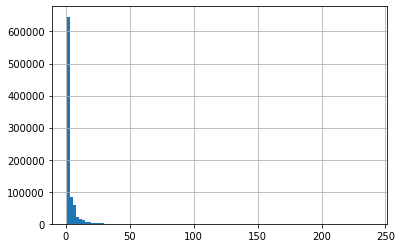

In [6]:
# # more than half of the accounts only place one order in one month
# print(df_shap_merged.groupby(['account_id','customer_lon','customer_lat']).count().order_id.describe())
# df_shap_merged.groupby(['account_id','customer_lon','customer_lat']).count().order_id.hist(bins=100)

In [109]:
# df_shap_merged.columns

## Make maps for all other features

In [5]:
selected_feature = 'estimated_rent'
# Some continuous features to be considered: incentive_amount_lc, entropy_0.5km, restaurant_count_0.5km, estimated_rent, price_per_item, incentive_delivery

df_onefeature = df_shap_merged[['account_id','order_id','customer_lon','customer_lat', selected_feature,'shap_'+selected_feature]]

<Axes: >

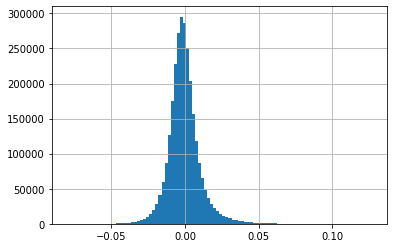

In [7]:
# print(df_onefeature[gdf_onefeature['shap_'+selected_feature]>0]['shap_'+selected_feature].describe())
df_onefeature['shap_'+selected_feature].hist(bins=100)
# gdf_onefeature[gdf_onefeature['Quadrant']=='High-Positive']['shap_'+selected_feature].describe()

In [8]:
# use the average for each person's SHAP value
feature_mean = df_onefeature[selected_feature].median()
shap_threshold = 0.00
# df_onefeature = df_onefeature.groupby(['account_id','customer_lon','customer_lat'])[[selected_feature,'shap_'+selected_feature]].mean().reset_index()
df_onefeature['Quadrant'] = 'NaN'
df_onefeature.loc[(df_onefeature[selected_feature]>=feature_mean) & (df_onefeature['shap_'+selected_feature]>shap_threshold),'Quadrant'] = 'High-Positive'
df_onefeature.loc[(df_onefeature[selected_feature]>=feature_mean) & (df_onefeature['shap_'+selected_feature]<=-1*shap_threshold),'Quadrant'] = 'High-Negative'
df_onefeature.loc[(df_onefeature[selected_feature]<feature_mean) & (df_onefeature['shap_'+selected_feature]>shap_threshold),'Quadrant'] = 'Low-Positive'
df_onefeature.loc[(df_onefeature[selected_feature]<feature_mean) & (df_onefeature['shap_'+selected_feature]<=-1*shap_threshold),'Quadrant'] = 'Low-Negative'
df_onefeature.Quadrant.value_counts()

Low-Negative     884703
High-Negative    699468
High-Positive    692016
Low-Positive     506774
Name: Quadrant, dtype: int64

In [9]:
%%time
geometry2 = [Point(xy) for xy in zip(df_onefeature.customer_lon, df_onefeature.customer_lat)]
gdf_onefeature = GeoDataFrame(df_onefeature, crs="EPSG:4326", geometry=geometry2)

CPU times: user 16.2 s, sys: 110 ms, total: 16.3 s
Wall time: 16.3 s


### Plot each individual quadrant

estimated_rent


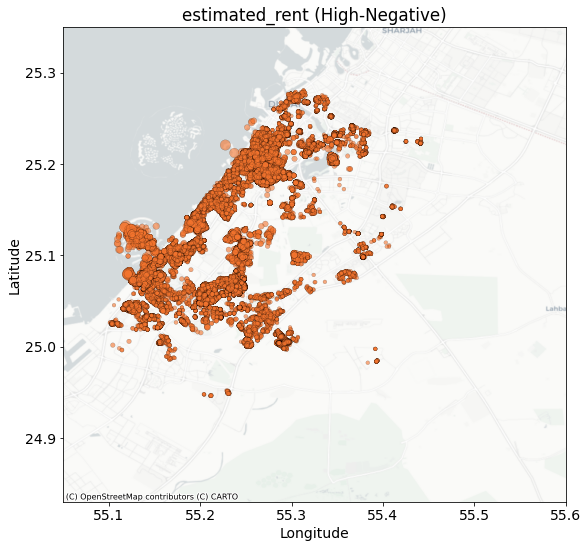

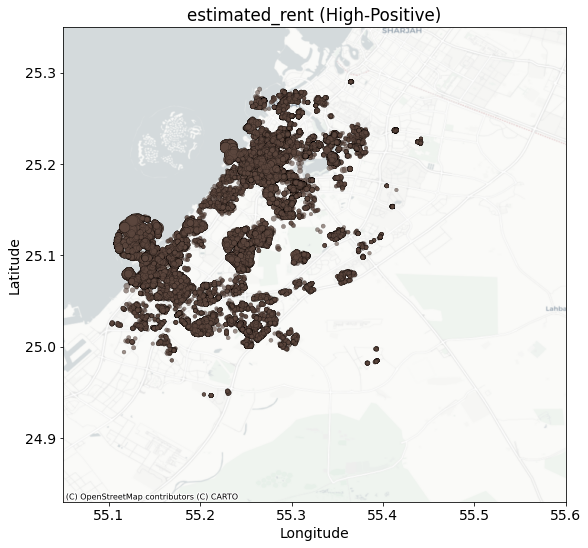

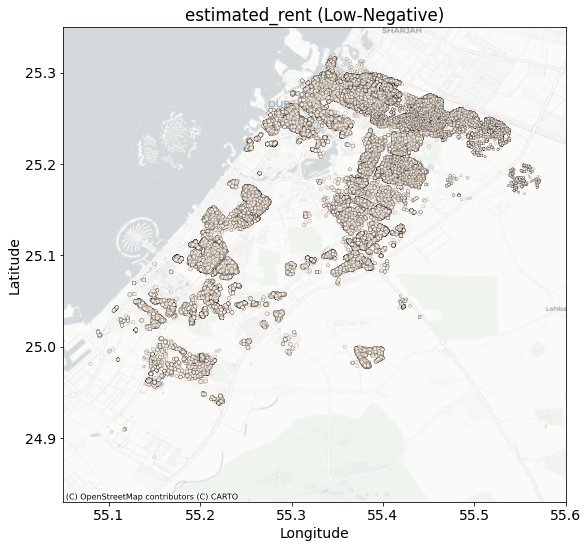

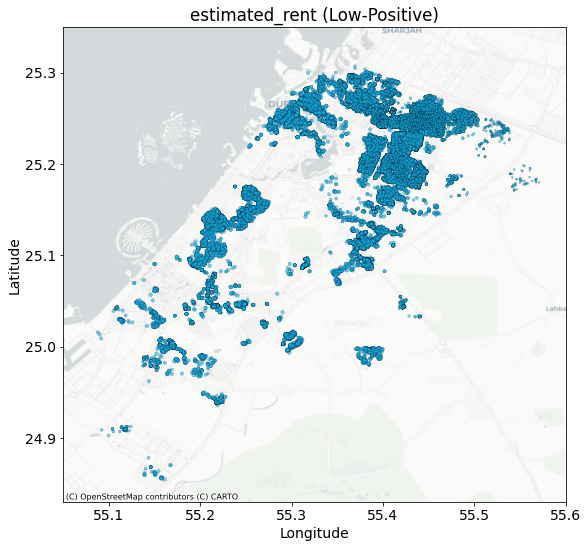

CPU times: user 1min 6s, sys: 7.92 s, total: 1min 14s
Wall time: 1min 3s


In [113]:
%%time
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 14})

print(selected_feature)

colorlist = {'High-Negative':'#f3742e', 'High-Positive':'#5c473e', 'Low-Negative':'#fef1e4', 'Low-Positive':'#18aee5'}
# cmap = mcolors.ListedColormap(colorlist)

for item in ['High-Negative', 'High-Positive', 'Low-Negative', 'Low-Positive']:
    fig, ax = plt.subplots(1, figsize=(9, 9))
    sub_gdf_onefeature = gdf_onefeature[gdf_onefeature['Quadrant']==item]
    sub_gdf_onefeature.plot(
#     sub_gdf_onefeature.head(1000).plot(
        column='Quadrant',         # Categorical column
        color=colorlist[item],               # Colormap for categories
        alpha=0.6,
        legend=True,               # Show legend for categories
        categorical=True,          # Specify that the column is categorical
        markersize= sub_gdf_onefeature[selected_feature]/5,
        edgecolor = 'black',
        linewidth=0.2,
        ax=ax                      # Plot on this axis
    )

#     handles = [
#         mpatches.Patch(color=colorlist[i], label=label)
#         for i, label in enumerate(['High-Negative', 'High-Positive', 'Low-Negative', 'Low-Positive'])
#     ]
#     ax.legend(handles=handles, title='Correlation\n(Feature-SHAP)')
    ax.set_xlim([55.05, 55.6])
    ax.set_ylim([24.83, 25.35])
    cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(selected_feature+' ('+item+')')
    plt.savefig('./output/spatial_SHAPlargerThan05_'+selected_feature+item+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [119]:
# %%time
# import matplotlib.pyplot as plt
# import contextily as cx
# import matplotlib.patches as mpatches
# import matplotlib.colors as mcolors

# plt.rcParams.update({'font.size': 14})
# fig, ax = plt.subplots(1, figsize=(9, 9))
# print(selected_feature)

# # High-Negative, High-Positive, Low-Negative, Low-Positive
# colorlist = ['#f3742e','#5c473e'] #['#fef1e4','#18aee5']
# cmap = mcolors.ListedColormap(colorlist)
# qualist = ['High-Negative', 'High-Positive']
# sub_gdf_onefeature = gdf_onefeature[gdf_onefeature['Quadrant'].isin(qualist)]
# sub_gdf_onefeature.plot(
# # sub_gdf_onefeature.head(1000).plot(
#     column='Quadrant',         # Categorical column
#     cmap=cmap,               # Colormap for categories
#     alpha=0.6,
#     legend=True,               # Show legend for categories
#     categorical=True,          # Specify that the column is categorical
#     markersize= sub_gdf_onefeature[selected_feature]/5,
#     edgecolor = 'black',
#     linewidth=0.2,
#     ax=ax                      # Plot on this axis
# )

# ax.set_xlim([55.05, 55.6])
# ax.set_ylim([24.83, 25.35])
# cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title(selected_feature)
# plt.savefig('./output/spatial_SHAP_HIGH_'+selected_feature+'.png', dpi=300, bbox_inches='tight')
# plt.show()

### Plot all quadrants in one graph

estimated_rent


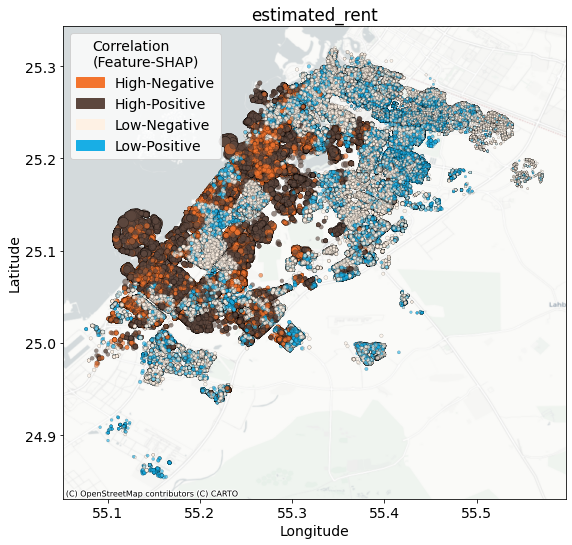

CPU times: user 4min 10s, sys: 28.3 s, total: 4min 38s
Wall time: 4min 7s


In [78]:
%%time
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(9, 9))
print(selected_feature)

# High-Negative, High-Positive, Low-Negative, Low-Positive
colorlist = ['#f3742e','#5c473e', '#fef1e4','#18aee5']
cmap = mcolors.ListedColormap(colorlist)

gdf_onefeature.plot(
# gdf_onefeature.head(1000).plot(
    column='Quadrant',         # Categorical column
    cmap=cmap,               # Colormap for categories
    alpha=0.6,
    legend=True,               # Show legend for categories
    categorical=True,          # Specify that the column is categorical
    markersize= gdf_onefeature[selected_feature]/5,
    edgecolor = 'black',
    linewidth=0.2,
    ax=ax                      # Plot on this axis
)

handles = [
    mpatches.Patch(color=colorlist[i], label=label)
    for i, label in enumerate(['High-Negative', 'High-Positive', 'Low-Negative', 'Low-Positive'])
]
ax.legend(handles=handles, title='Correlation\n(Feature-SHAP)')
cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(selected_feature)
plt.savefig('./output/spatial_SHAP_'+selected_feature+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
gdf_onefeature.head()

,account_id,order_id,customer_lon,customer_lat,estimated_rent,shap_estimated_rent,Quadrant,geometry
0,1237695,1304769890,55.14407,25.06988,87.94369,-0.01585,High-Negative,POINT (55.14407 25.06988)
1,1027548,1304769334,55.14435,25.06983,88.00245,-0.01359,High-Negative,POINT (55.14435 25.06983)
2,6430278,1306219965,55.14407,25.06991,87.94196,-0.01046,High-Negative,POINT (55.14407 25.06991)
3,6430278,1295994041,55.14407,25.06991,87.94196,-0.01017,High-Negative,POINT (55.14407 25.06991)
4,916448,1304742536,55.14021,25.06544,75.08175,-0.00766,High-Negative,POINT (55.14021 25.06544)


In [46]:
# %%time
# import contextily as cx

# ax = hexagon_agg_ordernumber.plot(figsize=(10, 10), cmap='Reds',column='estimated_rent',legend=True,edgecolor='white')
# xmin, ymin, xmax, ymax = hexagon_agg_ordernumber.total_bounds
# pad = 0.1; ax.set_xlim(xmin-pad, xmax+pad); ax.set_ylim(ymin-pad, ymax+pad)
# cx.add_basemap(ax, crs=hexagon_agg_ordernumber.crs, source=cx.providers.OpenStreetMap.Mapnik)
# # plt.title('Number of orders by customer locations')

In [47]:
# %%time

# import matplotlib.pyplot as plt

# hb = plt.hexbin(gdf_test['geometry'].x, gdf_test['geometry'].y, C=gdf_test.shap_estimated_rent, gridsize=50, cmap='viridis')
# #C： If given, these values are accumulated in the bins. 
# #reduce_C_function：default: numpy.mean，The function to aggregate C within the bins

# hex_values = hb.get_array()

# # Get the x and y coordinates of the hexagon centers
# hex_x, hex_y = hb.get_offsets().T

# # Create a DataFrame from the hexagon data
# hex_df = pd.DataFrame({
#     'hex_x': hex_x,        # X coordinates of hexagon centers
#     'hex_y': hex_y,        # Y coordinates of hexagon centers
#     'value': hex_values    # Values (counts) in each hexagon
# })

# plt.colorbar(label='SHAP Value')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# # plt.title('SHAP Value Hexbin Plot for Longitude and Latitude')
# plt.show()

## Make map for incentive_amount_lc

In [51]:
selected_feature = 'incentive_amount_lc'
# Some continuous features to be considered: incentive_amount_lc, entropy_0.5km, restaurant_count_0.5km, estimated_rent, price_per_item, incentive_delivery

df_onefeature = df_shap_merged[['account_id','order_id','customer_lon','customer_lat', selected_feature,'shap_'+selected_feature]]

In [52]:
df_onefeature[selected_feature].describe()

count   2782961.00000
mean    7.68740      
std     13.26610     
min     0.00000      
25%     0.00000      
50%     0.00000      
75%     12.50000     
max     1092.00000   
Name: incentive_amount_lc, dtype: float64

In [53]:
df_onefeature[df_onefeature[selected_feature]!=0][selected_feature].describe()

count   1038852.00000
mean    20.59362     
std     14.34116     
min     0.30000      
25%     10.00000     
50%     20.00000     
75%     30.00000     
max     1092.00000   
Name: incentive_amount_lc, dtype: float64

In [54]:
# for incentive_amount_lc because too many zeros, filter out those zeros for better mapping
print(df_onefeature.shape[0])
df_onefeature = df_onefeature[df_onefeature[selected_feature]!=0]
print(df_onefeature.shape[0])

2782961
1038852


In [55]:
# use the average for each person's SHAP value
feature_mean = df_onefeature[selected_feature].mean()

# df_onefeature = df_onefeature.groupby(['account_id','customer_lon','customer_lat'])[[selected_feature,'shap_'+selected_feature]].mean().reset_index()
df_onefeature.loc[(df_onefeature[selected_feature]>=feature_mean) & (df_onefeature['shap_'+selected_feature]>0),'Quadrant'] = 'High-Positive'
df_onefeature.loc[(df_onefeature[selected_feature]>=feature_mean) & (df_onefeature['shap_'+selected_feature]<=0),'Quadrant'] = 'High-Negative'
df_onefeature.loc[(df_onefeature[selected_feature]<feature_mean) & (df_onefeature['shap_'+selected_feature]>0),'Quadrant'] = 'Low-Positive'
df_onefeature.loc[(df_onefeature[selected_feature]<feature_mean) & (df_onefeature['shap_'+selected_feature]<=0),'Quadrant'] = 'Low-Negative'
df_onefeature.Quadrant.value_counts()

Low-Negative     436758
High-Negative    289339
High-Positive    175200
Low-Positive     137555
Name: Quadrant, dtype: int64

In [10]:
%%time
from sklearn.cluster import KMeans

X_1 = df_onefeature[selected_feature].values.reshape(-1, 1)

# Apply K-Means clustering with 4 clusters (similar to 4 classes)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_1)
df_onefeature['markersize'] = kmeans.labels_

print(df_onefeature['markersize'].value_counts())

In [65]:
print(df_onefeature.groupby('markersize')[selected_feature].agg(['min', 'max']))

df_onefeature.loc[df_onefeature.markersize == 0, 'markersize']  = 10
df_onefeature.loc[df_onefeature.markersize == 3, 'markersize']  = 20
df_onefeature.loc[df_onefeature.markersize == 1, 'markersize']  = 100
df_onefeature.loc[df_onefeature.markersize == 2, 'markersize']  = 200

                min        max
markersize                    
10         0.30000  13.23000  
20         13.23750 25.37500  
100        25.38000 59.69000  
200        59.70000 1092.00000


In [61]:
%%time
geometry2 = [Point(xy) for xy in zip(df_onefeature.customer_lon, df_onefeature.customer_lat)]
gdf_onefeature = GeoDataFrame(df_onefeature, crs="EPSG:4326", geometry=geometry2)

CPU times: user 6.16 s, sys: 188 ms, total: 6.35 s
Wall time: 6.17 s


incentive_amount_lc


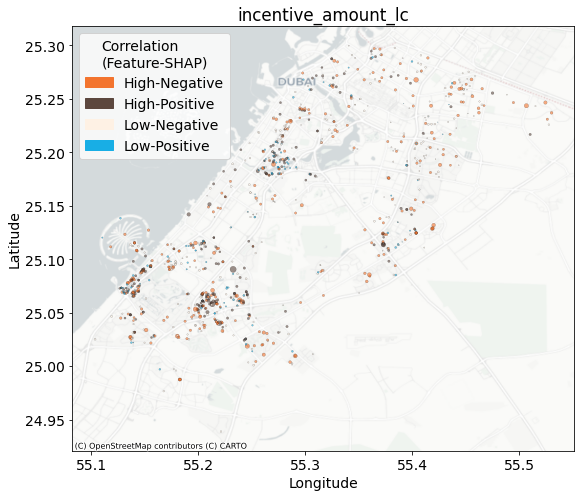

CPU times: user 2.2 s, sys: 262 ms, total: 2.46 s
Wall time: 1.98 s


In [63]:
%%time
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, figsize=(9, 9))
print(selected_feature)

# High-Negative, High-Positive, Low-Negative, Low-Positive
colorlist = ['#f3742e','#5c473e', '#fef1e4','#18aee5']
cmap = mcolors.ListedColormap(colorlist)

# gdf_onefeature.plot(
gdf_onefeature.head(1000).plot(
    column='Quadrant',         # Categorical column
    cmap=cmap,               # Colormap for categories
    alpha=0.6,
    legend=True,               # Show legend for categories
    categorical=True,          # Specify that the column is categorical
    markersize= gdf_onefeature[selected_feature]/5,
    edgecolor = 'black',
    linewidth=0.2,
    ax=ax                      # Plot on this axis
)

handles = [
    mpatches.Patch(color=colorlist[i], label=label)
    for i, label in enumerate(['High-Negative', 'High-Positive', 'Low-Negative', 'Low-Positive'])
]
ax.legend(handles=handles, title='Correlation\n(Feature-SHAP)')
cx.add_basemap(ax, crs=gdf_onefeature.crs, source=cx.providers.CartoDB.Positron)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(selected_feature)
plt.savefig('./output/spatial_SHAP_'+selected_feature+'.png', dpi=300, bbox_inches='tight')
plt.show()

# Finally, trying bivariate LISA to identify significant spatial clusters (doesn't work)

In [126]:
# %pip install splot

In [127]:
%matplotlib inline

import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot
from esda.moran import Moran_Local_BV
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

In [133]:
%%time
geometry2 = [Point(xy) for xy in zip(df_onefeature.customer_lon, df_onefeature.customer_lat)]
gdf_onefeature = GeoDataFrame(df_onefeature, crs="EPSG:4326", geometry=geometry2)
print(gdf_onefeature.shape[0])

2782961
CPU times: user 16.6 s, sys: 144 ms, total: 16.7 s
Wall time: 16.6 s


In [144]:
%%time
# 1min 32s
from libpysal.weights import KNN

w=KNN.from_dataframe(gdf_onefeature,k=8)
w.transform = 'r'
# w.pct_nonzero

CPU times: user 1min 28s, sys: 4.27 s, total: 1min 32s
Wall time: 1min 32s


In [ ]:
w

In [ ]:
%%time

x = gdf_onefeature[selected_feature].values
y = gdf_onefeature['shap_'+selected_feature].values
moran_loc_bv = Moran_Local_BV(x, y, w, permutations=1000)

In [ ]:
# Break observations into significant or not
gdf_onefeature['significant'] = moran_loc_bv.p_sim < 0.05
# Store the quadrant they belong to
gdf_onefeature['quadrant'] = moran_loc_bv.q
#The correspondence between the numbers in the variable and the actual quadrants is as follows:
# 1: HH
# 2: LH
# 3: LL
# 4: HL

In [ ]:
hh = gdf_onefeature[(gdf_onefeature['quadrant']==1) & (gdf_onefeature['significant']==True)]
hl = gdf_onefeature[(gdf_onefeature['quadrant']==4) & (gdf_onefeature['significant']==True)]
# lh = gdf_onefeature[(gdf_onefeature['quadrant']==2) & (gdf_onefeature['significant']==True)] 
print(hh.selected_feature.describe())
print(hh['shap_'+selected_feature].describe()) 

print(hl.selected_feature.describe())
print(hl['shap_'+selected_feature].describe()) 

# print(lh.selected_feature.describe())
# print(lh['shap_'+selected_feature].describe())

# lh_diversity = lh[(lh['home_class2']=='low diversity')&(lh['class']=='high diversity')]
# print(lh.shape[0], lh_diversity.shape[0])
# hl_diversity = hl[(hl['home_class2']=='high diversity')&(hl['class']=='low diversity')]
# print(hl.shape[0],hl_diversity.shape[0])

In [ ]:
import contextily as cx

plt.rcParams.update({'font.size': 12})
f, ax = plt.subplots(1, figsize=(9, 9))
lh.plot(ax=ax, color='green',markersize=3,label='Low-High')
# lh_diversity.plot(ax=ax, color='green',label='Low-High',markersize=3)
# hl.plot(ax=ax, color='#ffd4a3',markersize=3)
# hl_diversity.plot(ax=ax, color='#ff7b00',label='High-Low',markersize=3)
plt.legend(markerscale=5)
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)
# plt.savefig('./LA_high_low_cluster.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
plt.rcParams.update({'font.size': 12})
f, ax = plt.subplots(1, figsize=(9, 9))
hh.plot(ax=ax, color='red',markersize=3,label='High-High')
# hh_diversity.plot(ax=ax, color='red',label='High-High',markersize=3)  
# ll.plot(ax=ax, color='#83cef4',markersize=3) 
# ll_diversity.plot(ax=ax, color='blue',label='Low-Low',markersize=3) 

plt.legend(markerscale=5)
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.Positron)
# plt.savefig('./LA_hh_ll_cluster.png',dpi=300,bbox_inches='tight')
plt.show()